<a href="https://colab.research.google.com/github/Saphall/Intern-Suven-Consultant/blob/main/Meteorological_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Performing Analysis of Meteorological Data**

##**1. Problem**
Has the Apparent temperature and humidity compared monthly
across 10 years of the data indicate an increase due to Global warming ?

## **2. Data**
The data we're using is the Weather dataset from kaggle.
(Source URL: https://www.kaggle.com/muthuj7/weather-dataset) 
The dataset has hourly temperature recorded for last 10 years starting from 2006-04-0100:00:00.000 +0200 to 2016-09-09 23:00:00.000 +0200. It corresponds to Finland, a country in the Northern Europe.

## **3. Evaluation**
We've to evaluate the average Apparent temperature and  average humidity on monthly basis for 10 years, from year 2006 to 2016.

* **Apparent temperature:** Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed.
* **Humidity:** Humidity is the concentration of water vapor present in the air.

In [509]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [195]:
# Read the required dataset

df=pd.read_csv('drive/My Drive/Meteorological Data/weatherHistory.csv')
df.head().T

,0,1,2,3,4
Formatted Date,2006-04-01 00:00:00.000 +0200,2006-04-01 01:00:00.000 +0200,2006-04-01 02:00:00.000 +0200,2006-04-01 03:00:00.000 +0200,2006-04-01 04:00:00.000 +0200
Summary,Partly Cloudy,Partly Cloudy,Mostly Cloudy,Partly Cloudy,Mostly Cloudy
Precip Type,rain,rain,rain,rain,rain
Temperature (C),9.47222,9.35556,9.37778,8.28889,8.75556
Apparent Temperature (C),7.38889,7.22778,9.37778,5.94444,6.97778
Humidity,0.89,0.86,0.89,0.83,0.83
Wind Speed (km/h),14.1197,14.2646,3.9284,14.1036,11.0446
Wind Bearing (degrees),251,259,204,269,259
Visibility (km),15.8263,15.8263,14.9569,15.8263,15.8263
Pressure (millibars),1015.13,1015.63,1015.94,1016.41,1016.51


In [196]:
#Check the datatypes of all columns
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [197]:
# Changing the object type 'Formatted Date' into datetime type.
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                    int64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [198]:
#sort dataframe in date order
df.sort_values(by=['Formatted Date'],inplace=True,ascending=True)

In [199]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
2880,2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140,9.9820,1016.66,Mostly cloudy throughout the day.
2881,2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139,9.9015,1016.15,Mostly cloudy throughout the day.
2882,2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140,9.9015,1015.87,Mostly cloudy throughout the day.
2883,2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140,9.9015,1015.56,Mostly cloudy throughout the day.
2884,2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134,9.9015,1014.98,Mostly cloudy throughout the day.


In [200]:
# Dropping first row containing data from 2005
df=df.drop([2880])
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
2881,2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139,9.9015,1016.15,Mostly cloudy throughout the day.
2882,2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140,9.9015,1015.87,Mostly cloudy throughout the day.
2883,2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140,9.9015,1015.56,Mostly cloudy throughout the day.
2884,2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134,9.9015,1014.98,Mostly cloudy throughout the day.
2885,2006-01-01 04:00:00+00:00,Mostly Cloudy,rain,1.205556,-3.072222,0.85,15.9068,149,9.9820,1014.08,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
89728,2016-12-31 18:00:00+00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167,8.0178,1020.03,Mostly cloudy throughout the day.
89729,2016-12-31 19:00:00+00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169,7.2450,1020.27,Mostly cloudy throughout the day.
89730,2016-12-31 20:00:00+00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175,9.5795,1020.50,Mostly cloudy throughout the day.
89731,2016-12-31 21:00:00+00:00,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182,8.4042,1020.65,Mostly cloudy throughout the day.


In [201]:
# Lets set index to 'Formatted Date' so that we can analyze easily
df=df.set_index('Formatted Date')
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139,9.9015,1016.15,Mostly cloudy throughout the day.
2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140,9.9015,1015.87,Mostly cloudy throughout the day.
2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140,9.9015,1015.56,Mostly cloudy throughout the day.
2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134,9.9015,1014.98,Mostly cloudy throughout the day.
2006-01-01 04:00:00+00:00,Mostly Cloudy,rain,1.205556,-3.072222,0.85,15.9068,149,9.9820,1014.08,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-12-31 18:00:00+00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167,8.0178,1020.03,Mostly cloudy throughout the day.
2016-12-31 19:00:00+00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169,7.2450,1020.27,Mostly cloudy throughout the day.
2016-12-31 20:00:00+00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175,9.5795,1020.50,Mostly cloudy throughout the day.


In [521]:
# Cleaning and taking only necessary columns (average 'Apparent Temperature' and average 'Humidity') for analysis according to hypothesis

data = df[['Apparent Temperature (C)','Humidity']].resample('M').mean()
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625
2006-05-31 00:00:00+00:00,15.539479,0.721801
...,...,...
2016-08-31 00:00:00+00:00,21.383094,0.674046
2016-09-30 00:00:00+00:00,18.355833,0.688833
2016-10-31 00:00:00+00:00,8.923947,0.799906


In [522]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2006-01-31 00:00:00+00:00 to 2016-12-31 00:00:00+00:00
Freq: M
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Apparent Temperature (C)  132 non-null    float64
 1   Humidity                  132 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


##**Now we have all clean data i.e. Non-null and required columns, for evaluation, lets visualize our evaluation for each month of ten years.(2006-2016)**



### The montly season classification is :
* winter (December, January, February)
* spring (March, April, May)
* summer (June, July, August)
* autumn (September, October, November)



#**1. January** 
**(winter)**

In [523]:
jan =data[data.index.month.isin([1])]
jan

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2007-01-31 00:00:00+00:00,2.387015,0.813495
2008-01-31 00:00:00+00:00,-2.069907,0.819476
2009-01-31 00:00:00+00:00,-3.669937,0.867621
2010-01-31 00:00:00+00:00,-4.329062,0.875914
2011-01-31 00:00:00+00:00,-2.186813,0.922030
2012-01-31 00:00:00+00:00,-1.965211,0.797581
2013-01-31 00:00:00+00:00,-1.768578,0.883105
2014-01-31 00:00:00+00:00,0.234536,0.846169


In [524]:
jan['Apparent Temperature (C)'].describe() , jan['Humidity'].describe()

(count    11.000000
 mean     -1.938761
 std       1.994305
 min      -4.329062
 25%      -3.342257
 50%      -2.069907
 75%      -1.269351
 max       2.387015
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.850698
 std       0.036231
 min       0.797581
 25%       0.825497
 50%       0.846169
 75%       0.871767
 max       0.922030
 Name: Humidity, dtype: float64)

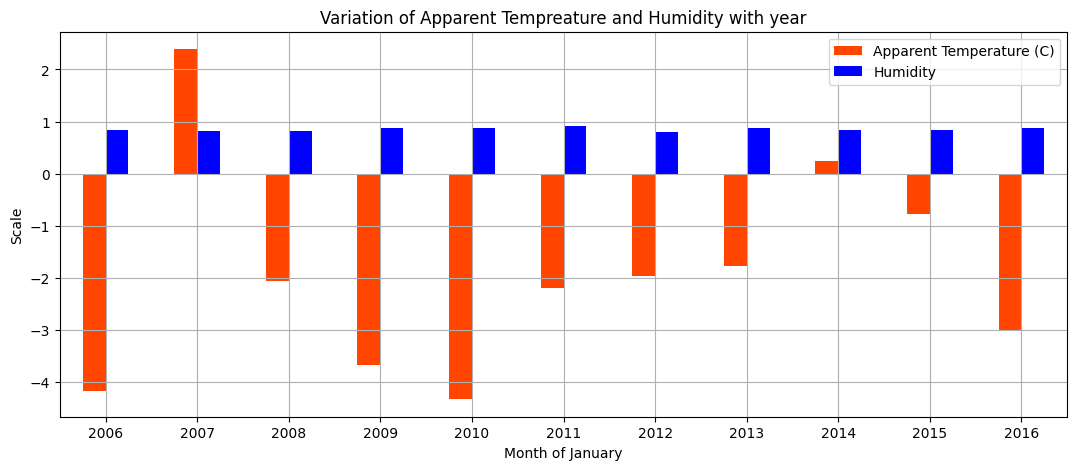

In [529]:
# Bar plot

data[data.index.month.isin([1])].plot.bar(figsize=(13,5),
                                       xlabel='Month of January',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.grid(True);

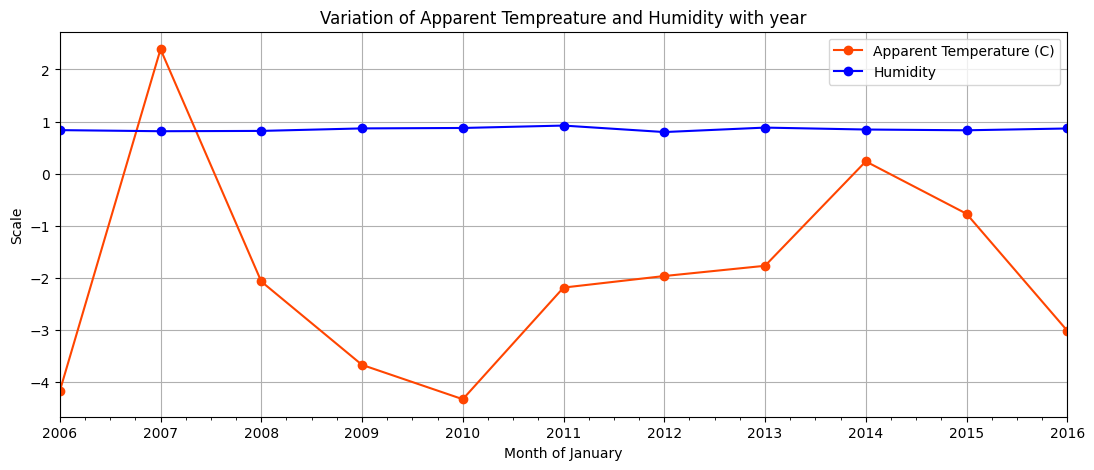

In [530]:
# Line plot

data[data.index.month.isin([1])].plot(figsize=(13,5),
                                      marker='o',
                                      xlabel='Month of January',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.grid();


# **2. February**
**(winter)**


In [359]:
feb =data[data.index.month.isin([2])]
feb

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2007-02-28 00:00:00+00:00,2.639848,0.815015
2008-02-29 00:00:00+00:00,1.915597,0.682615
2009-02-28 00:00:00+00:00,-1.641237,0.821161
2010-02-28 00:00:00+00:00,-1.662045,0.851682
2011-02-28 00:00:00+00:00,-2.849471,0.854137
2012-02-29 00:00:00+00:00,-8.817241,0.762859
2013-02-28 00:00:00+00:00,0.418171,0.869345
2014-02-28 00:00:00+00:00,2.742998,0.812530


In [360]:
feb['Apparent Temperature (C)'].describe() , feb['Humidity'].describe()

(count    11.000000
 mean     -0.552392
 std       3.639693
 min      -8.817241
 25%      -2.255758
 50%       0.017006
 75%       2.277722
 max       4.150782
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.813920
 std       0.052467
 min       0.682615
 25%       0.807991
 50%       0.821161
 75%       0.847574
 max       0.869345
 Name: Humidity, dtype: float64)

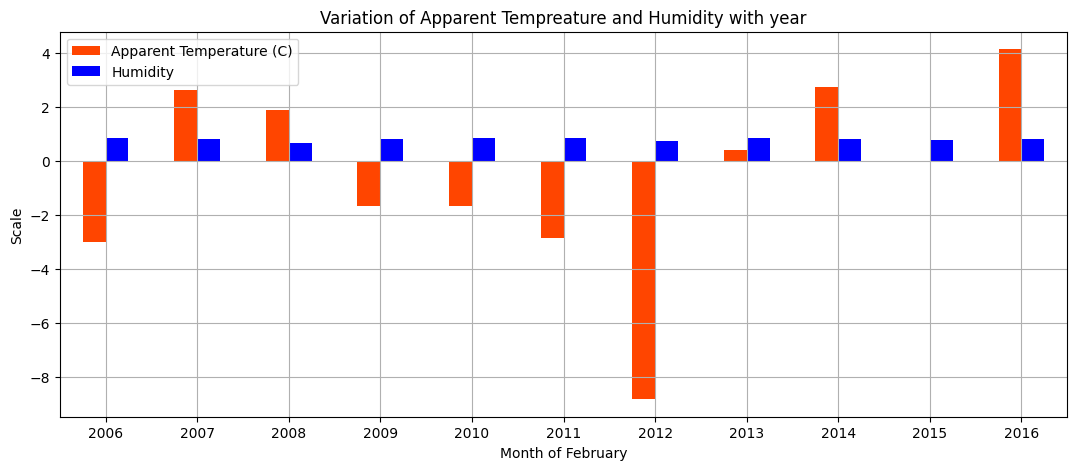

In [533]:
# Bar plot

data[data.index.month.isin([2])].plot.bar(figsize=(13,5),
                                       xlabel='Month of February',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.grid(True);

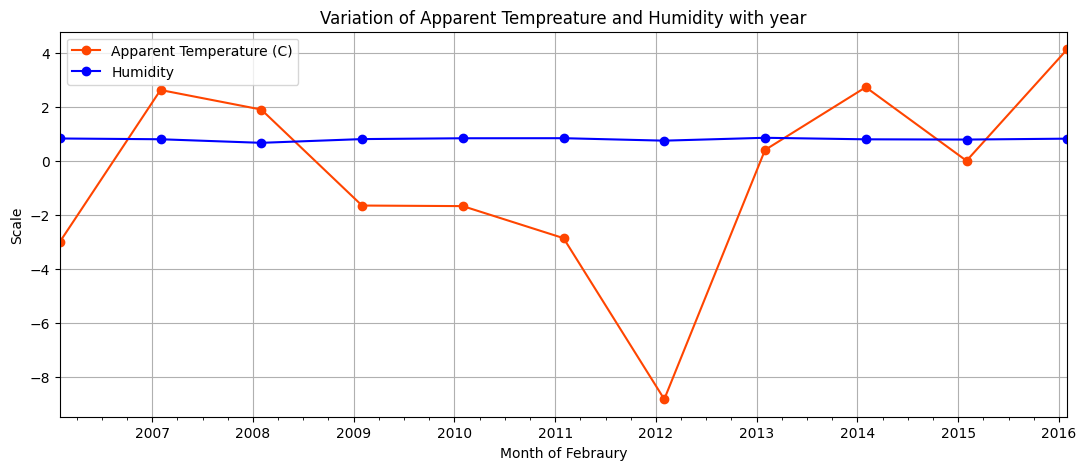

In [534]:
# Line plot

data[data.index.month.isin([2])].plot(figsize=(13,5),
                                      marker='o',
                                      xlabel='Month of Febraury',
                                      ylabel='Scale',
                 color=['orangered','blue'])

plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.grid();

# **3. March**
**(spring)**

In [274]:
mar =data[data.index.month.isin([3])]
mar

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 00:00:00+00:00,1.969780,0.778737
2007-03-31 00:00:00+00:00,7.174619,0.713884
2008-03-31 00:00:00+00:00,5.004353,0.668468
2009-03-31 00:00:00+00:00,4.280585,0.696680
2010-03-31 00:00:00+00:00,4.589038,0.670161
2011-03-31 00:00:00+00:00,4.589785,0.782970
2012-03-31 00:00:00+00:00,6.591502,0.535941
2013-03-31 00:00:00+00:00,1.957445,0.809946
2014-03-31 00:00:00+00:00,8.408303,0.640403


In [285]:
mar['Apparent Temperature (C)'].describe() , mar['Humidity'].describe()

(count    11.000000
 mean      5.082583
 std       1.977499
 min       1.957445
 25%       4.434812
 50%       5.004353
 75%       6.246453
 max       8.408303
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.702849
 std       0.079217
 min       0.535941
 25%       0.668972
 50%       0.696680
 75%       0.771707
 max       0.809946
 Name: Humidity, dtype: float64)

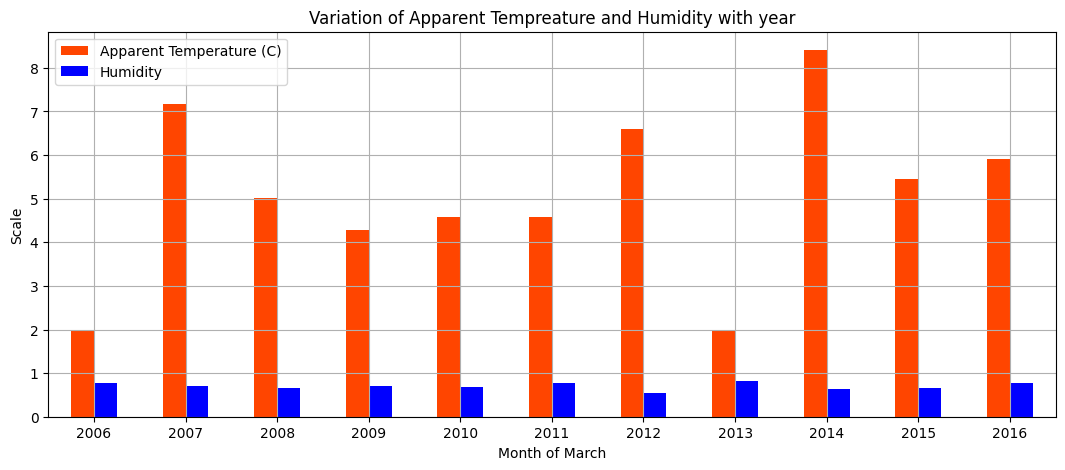

In [535]:
# Bar plot

data[data.index.month.isin([3])].plot.bar(figsize=(13,5),
                                       xlabel='Month of March',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.grid(True);

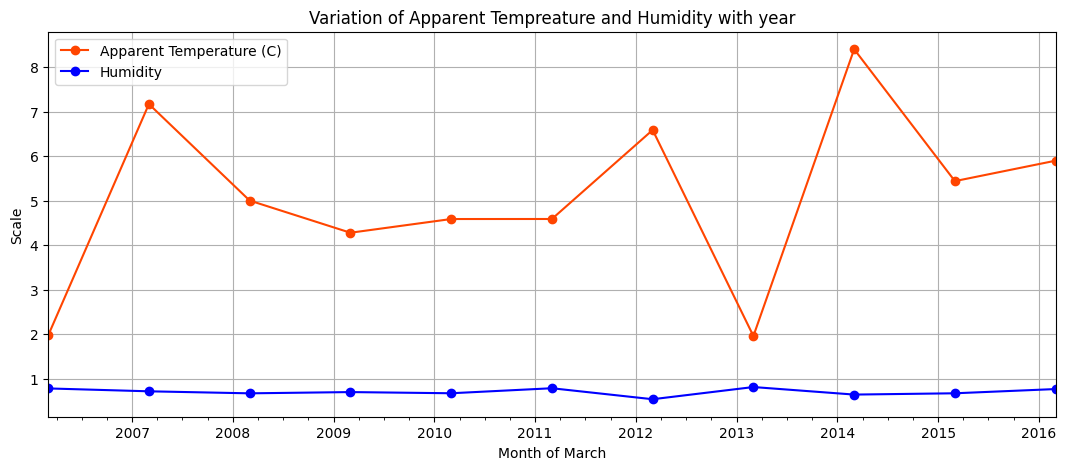

In [536]:
# Line plot

data[data.index.month.isin([3])].plot(figsize=(13,5),
                                      marker='o',
                                      xlabel='Month of March',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year');
plt.grid();


# **4. April**
**(spring)**

In [275]:
apl =data[data.index.month.isin([4])]
apl

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-30 00:00:00+00:00,12.098827,0.728625
2007-04-30 00:00:00+00:00,11.894421,0.536361
2008-04-30 00:00:00+00:00,11.183688,0.693194
2009-04-30 00:00:00+00:00,14.267076,0.567847
2010-04-30 00:00:00+00:00,11.639406,0.706875
2011-04-30 00:00:00+00:00,12.978997,0.591625
2012-04-30 00:00:00+00:00,11.782770,0.650222
2013-04-30 00:00:00+00:00,12.045563,0.677667
2014-04-30 00:00:00+00:00,12.486181,0.691403


In [286]:
apl['Apparent Temperature (C)'].describe() , apl['Humidity'].describe()

(count    11.000000
 mean     12.158287
 std       0.965900
 min      10.632801
 25%      11.711088
 50%      12.045563
 75%      12.608804
 max      14.267076
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.641051
 std       0.068193
 min       0.536361
 25%       0.579736
 50%       0.659972
 75%       0.692299
 max       0.728625
 Name: Humidity, dtype: float64)

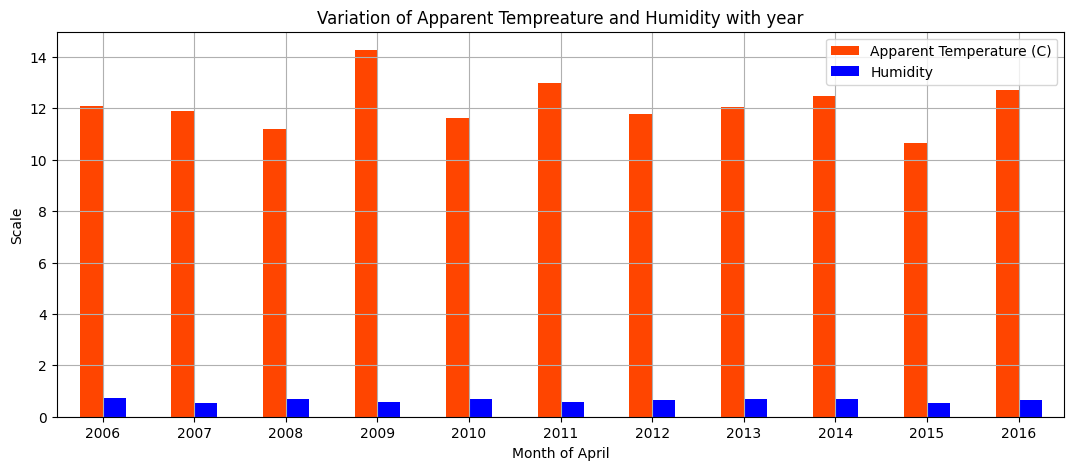

In [537]:
# Bar plot

data[data.index.month.isin([4])].plot.bar(figsize=(13,5),
                                       xlabel='Month of April',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.grid(True);

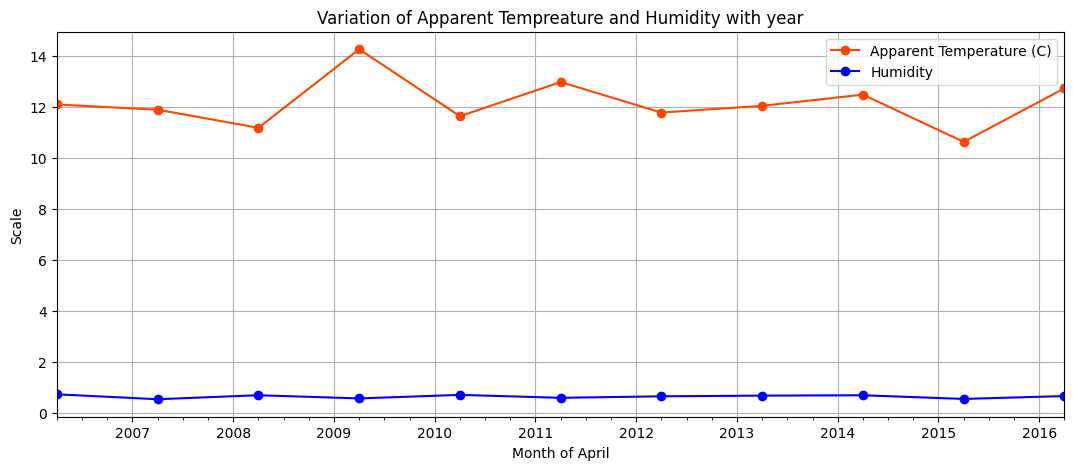

In [538]:
# Line plot

data[data.index.month.isin([4])].plot(figsize=(13,5),
                                      marker='o',
                                      xlabel='Month of April',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.grid();


# **5. May**
**(spring)**


In [276]:
may =data[data.index.month.isin([5])]
may

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-05-31 00:00:00+00:00,15.539479,0.721801
2007-05-31 00:00:00+00:00,17.453136,0.653253
2008-05-31 00:00:00+00:00,17.113583,0.663132
2009-05-31 00:00:00+00:00,17.691256,0.597151
2010-05-31 00:00:00+00:00,16.409879,0.773091
2011-05-31 00:00:00+00:00,16.644922,0.688038
2012-05-31 00:00:00+00:00,16.985596,0.672863
2013-05-31 00:00:00+00:00,17.208976,0.735309
2014-05-31 00:00:00+00:00,15.752218,0.698602


In [287]:
may['Apparent Temperature (C)'].describe() , may['Humidity'].describe()

(count    11.000000
 mean     16.733265
 std       0.690476
 min      15.539479
 25%      16.304547
 50%      16.985596
 75%      17.161279
 max      17.691256
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.691650
 std       0.046167
 min       0.597151
 25%       0.667997
 50%       0.698602
 75%       0.712272
 max       0.773091
 Name: Humidity, dtype: float64)

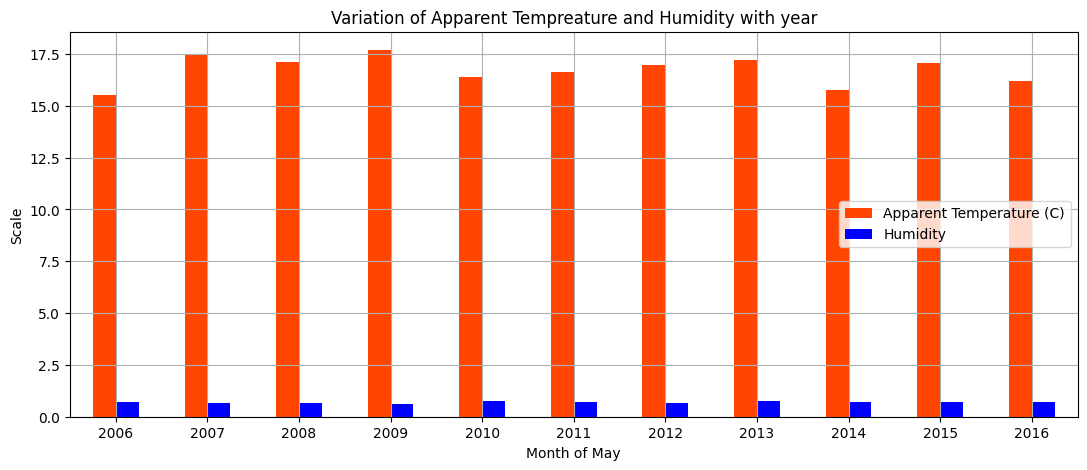

In [539]:
# Bar plot

data[data.index.month.isin([5])].plot.bar(figsize=(13,5),
                                       xlabel='Month of May',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.legend(loc='center right')
plt.grid(True);

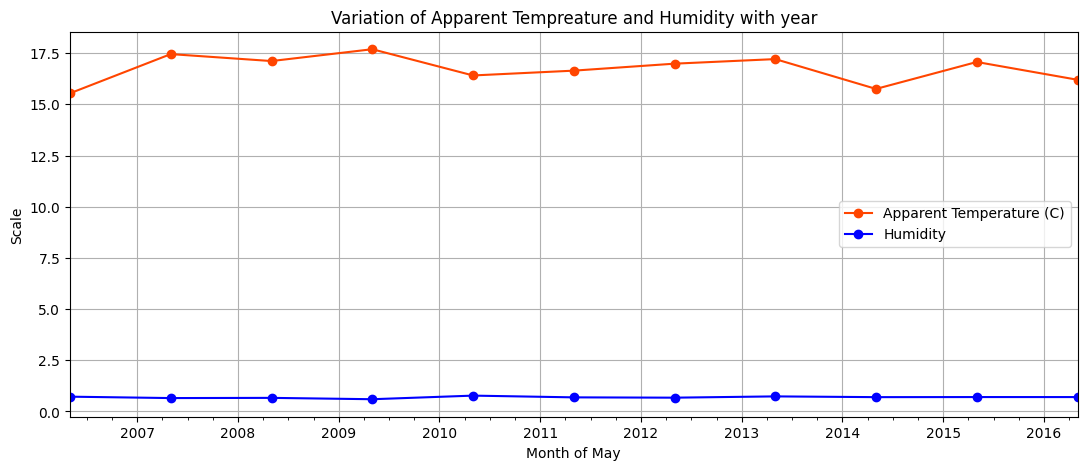

In [540]:
# Line plot

data[data.index.month.isin([5])].plot(figsize=(13,5),
                                      marker='o',
                                        xlabel='Month of May',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year');
plt.grid();

#**6. June**
**(summer)**

In [288]:
jun =data[data.index.month.isin([6])]
jun

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-06-30 00:00:00+00:00,19.535965,0.747125
2007-06-30 00:00:00+00:00,21.883102,0.616486
2008-06-30 00:00:00+00:00,21.513750,0.679861
2009-06-30 00:00:00+00:00,19.526790,0.675944
2010-06-30 00:00:00+00:00,20.340571,0.778347
2011-06-30 00:00:00+00:00,21.157114,0.677611
2012-06-30 00:00:00+00:00,22.157130,0.622306
2013-06-30 00:00:00+00:00,20.345664,0.761847
2014-06-30 00:00:00+00:00,19.874306,0.602403


In [289]:
jun['Apparent Temperature (C)'].describe() , jun['Humidity'].describe()

(count    11.000000
 mean     20.755415
 std       0.929861
 min      19.526790
 25%      20.107438
 50%      20.511782
 75%      21.488569
 max      22.157130
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.686418
 std       0.061076
 min       0.602403
 25%       0.638757
 50%       0.677611
 75%       0.740292
 max       0.778347
 Name: Humidity, dtype: float64)

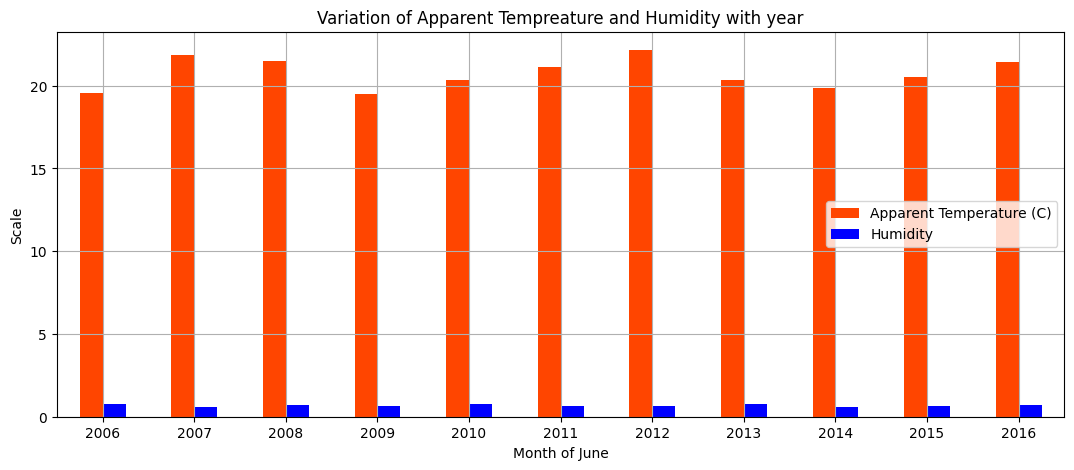

In [541]:
# Bar plot

data[data.index.month.isin([6])].plot.bar(figsize=(13,5),
                                       xlabel='Month of June',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.legend(loc='center right')
plt.grid(True);

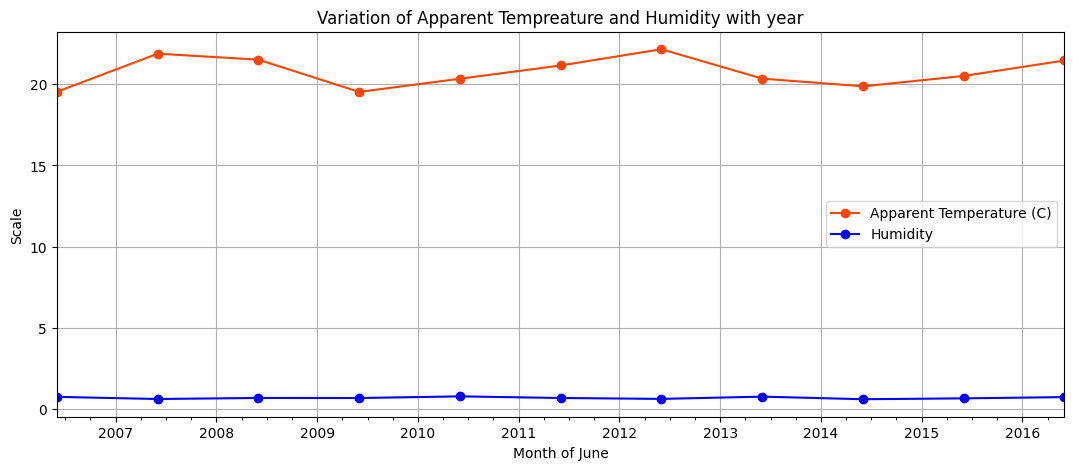

In [542]:
# Line plot

data[data.index.month.isin([6])].plot(figsize=(13,5),
                                      marker='o',
                                      xlabel='Month of June',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year');
plt.grid();

# **7. July**
**(summer)**

In [290]:
jul =data[data.index.month.isin([7])]
jul

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-07-31 00:00:00+00:00,23.595348,0.656304
2007-07-31 00:00:00+00:00,23.348081,0.491250
2008-07-31 00:00:00+00:00,21.765562,0.616022
2009-07-31 00:00:00+00:00,23.091614,0.600215
2010-07-31 00:00:00+00:00,23.699447,0.755323
2011-07-31 00:00:00+00:00,21.634984,0.707500
2012-07-31 00:00:00+00:00,24.525343,0.580860
2013-07-31 00:00:00+00:00,22.533669,0.636586
2014-07-31 00:00:00+00:00,21.911598,0.699393


In [291]:
jul['Apparent Temperature (C)'].describe() , jul['Humidity'].describe()

(count    11.000000
 mean     22.977215
 std       0.935654
 min      21.634984
 25%      22.222634
 50%      23.091614
 75%      23.647398
 max      24.525343
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.639615
 std       0.071127
 min       0.491250
 25%       0.608118
 50%       0.636586
 75%       0.684360
 max       0.755323
 Name: Humidity, dtype: float64)

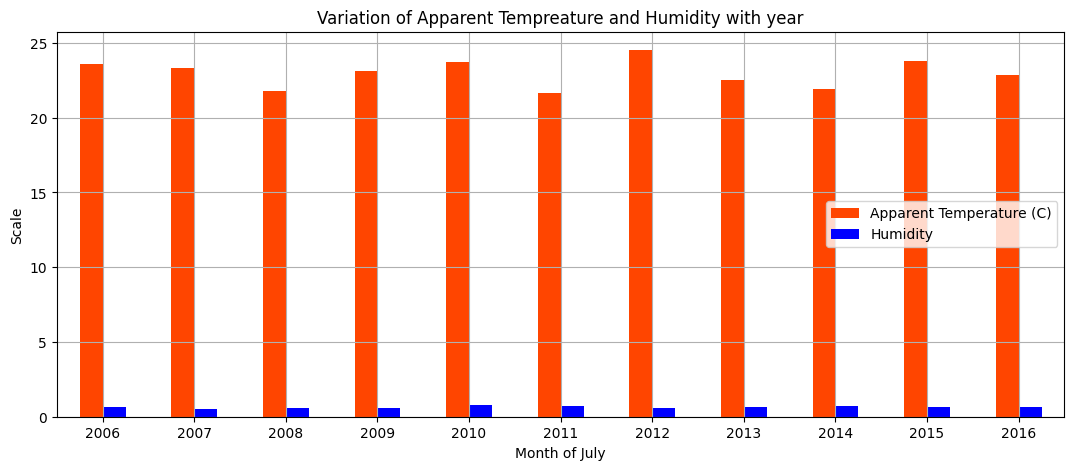

In [543]:
# Bar plot

data[data.index.month.isin([7])].plot.bar(figsize=(13,5),
                                       xlabel='Month of July',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.legend(loc='center right')
plt.grid(True);

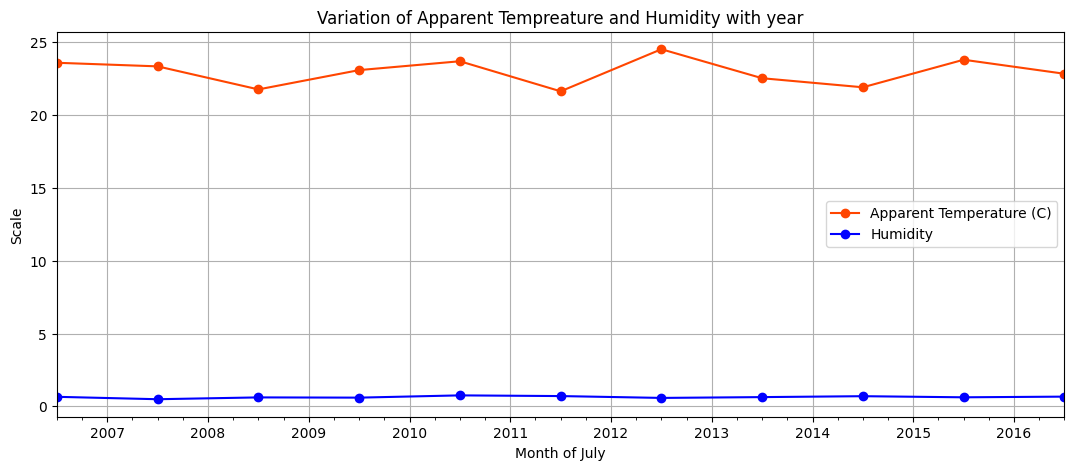

In [544]:
# Line plot

data[data.index.month.isin([7])].plot(figsize=(13,5),
                                      marker='o',
                                      xlabel='Month of July',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year');
plt.grid();

# **8. August**
**(summer)**

In [292]:
aug =data[data.index.month.isin([8])]
aug

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-08-31 00:00:00+00:00,19.528241,0.760753
2007-08-31 00:00:00+00:00,23.079689,0.562876
2008-08-31 00:00:00+00:00,22.438852,0.551895
2009-08-31 00:00:00+00:00,22.794205,0.597231
2010-08-31 00:00:00+00:00,21.906713,0.742786
2011-08-31 00:00:00+00:00,22.874126,0.631263
2012-08-31 00:00:00+00:00,23.384334,0.500081
2013-08-31 00:00:00+00:00,23.005249,0.596263
2014-08-31 00:00:00+00:00,20.781870,0.707809


In [293]:
aug['Apparent Temperature (C)'].describe() , aug['Humidity'].describe()

(count    11.000000
 mean     22.265649
 std       1.262309
 min      19.528241
 25%      21.644904
 50%      22.794205
 75%      23.042469
 max      23.745766
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.634984
 std       0.082539
 min       0.500081
 25%       0.579570
 50%       0.631263
 75%       0.690927
 max       0.760753
 Name: Humidity, dtype: float64)

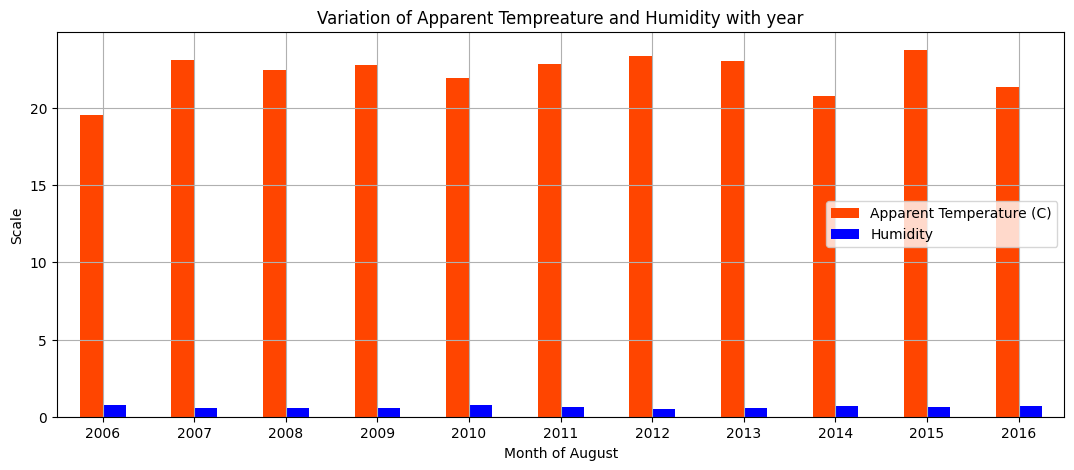

In [546]:
# Bar plot

data[data.index.month.isin([8])].plot.bar(figsize=(13,5),
                                       xlabel='Month of August',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.legend(loc='center right')
plt.grid(True);

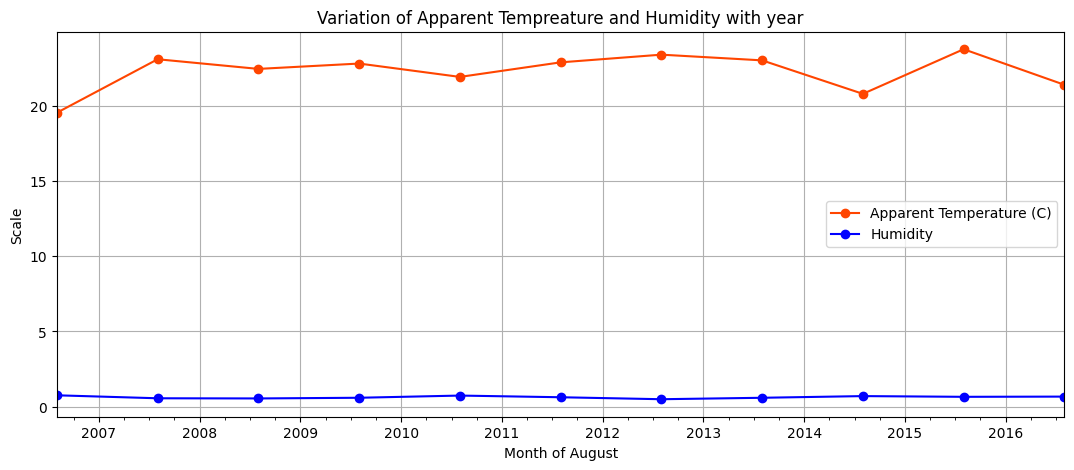

In [547]:
# Line plot

data[data.index.month.isin([8])].plot(figsize=(13,5),
                                      marker='o',
                                      xlabel='Month of August',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year');
plt.grid();

#**9. September**
**(autumn)**

In [294]:
sep =data[data.index.month.isin([9])]
sep

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-09-30 00:00:00+00:00,18.155571,0.689444
2007-09-30 00:00:00+00:00,14.328457,0.682708
2008-09-30 00:00:00+00:00,15.489606,0.690722
2009-09-30 00:00:00+00:00,19.322353,0.596764
2010-09-30 00:00:00+00:00,15.549414,0.826806
2011-09-30 00:00:00+00:00,19.899900,0.611375
2012-09-30 00:00:00+00:00,19.302948,0.603319
2013-09-30 00:00:00+00:00,15.317477,0.691986
2014-09-30 00:00:00+00:00,17.258387,0.785944


In [295]:
sep['Apparent Temperature (C)'].describe() , sep['Humidity'].describe()

(count    11.000000
 mean     17.389856
 std       1.916780
 min      14.328457
 25%      15.519510
 50%      18.155571
 75%      18.829390
 max      19.899900
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.689163
 std       0.071334
 min       0.596764
 25%       0.647042
 50%       0.689444
 75%       0.702438
 max       0.826806
 Name: Humidity, dtype: float64)

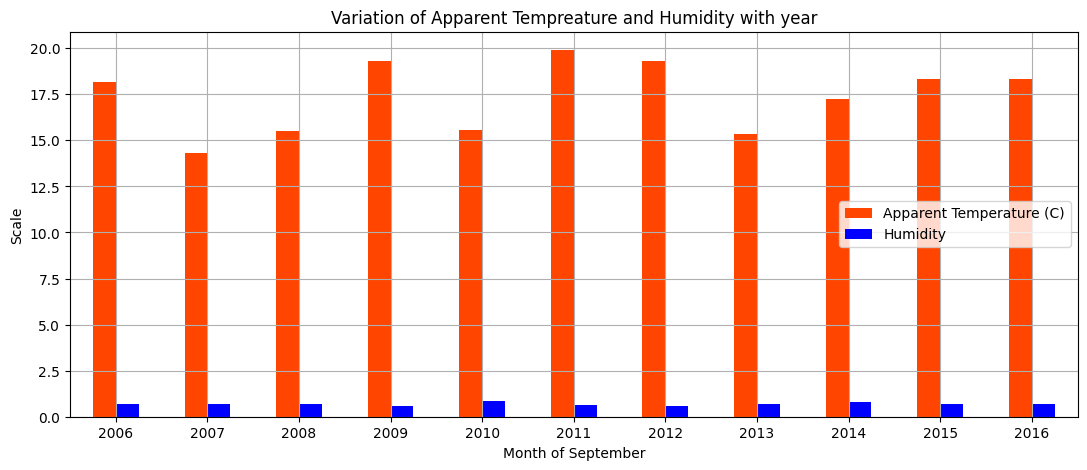

In [548]:
# Bar plot

data[data.index.month.isin([9])].plot.bar(figsize=(13,5),
                                       xlabel='Month of September',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.legend(loc='center right')
plt.grid(True);

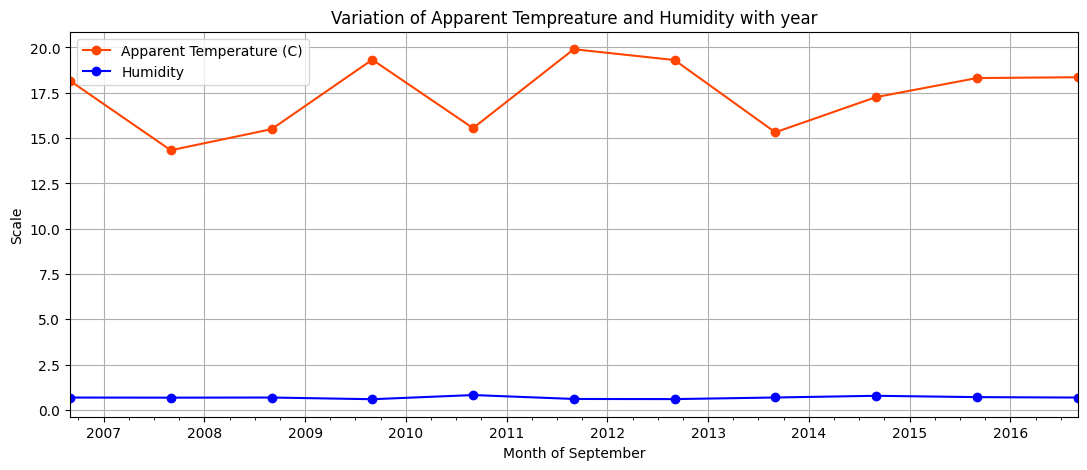

In [550]:
# Line plot

data[data.index.month.isin([9])].plot(figsize=(13,5),
                                      marker='o',
                                      xlabel='Month of September',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year');
plt.grid();

# **10. October**
**(autumn)**

In [296]:
oct =data[data.index.month.isin([10])]
oct

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-10-31 00:00:00+00:00,12.398678,0.733642
2007-10-31 00:00:00+00:00,9.662612,0.740954
2008-10-31 00:00:00+00:00,12.253390,0.753911
2009-10-31 00:00:00+00:00,10.433535,0.763468
2010-10-31 00:00:00+00:00,8.017145,0.815538
2011-10-31 00:00:00+00:00,9.405167,0.701747
2012-10-31 00:00:00+00:00,11.435581,0.794315
2013-10-31 00:00:00+00:00,12.449134,0.748750
2014-10-31 00:00:00+00:00,12.381803,0.826116


In [297]:
oct['Apparent Temperature (C)'].describe() , oct['Humidity'].describe()

(count    11.000000
 mean     10.684673
 std       1.586861
 min       8.017145
 25%       9.533890
 50%      10.433535
 75%      12.317596
 max      12.449134
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.774443
 std       0.043637
 min       0.701747
 25%       0.744852
 50%       0.763468
 75%       0.807722
 max       0.840524
 Name: Humidity, dtype: float64)

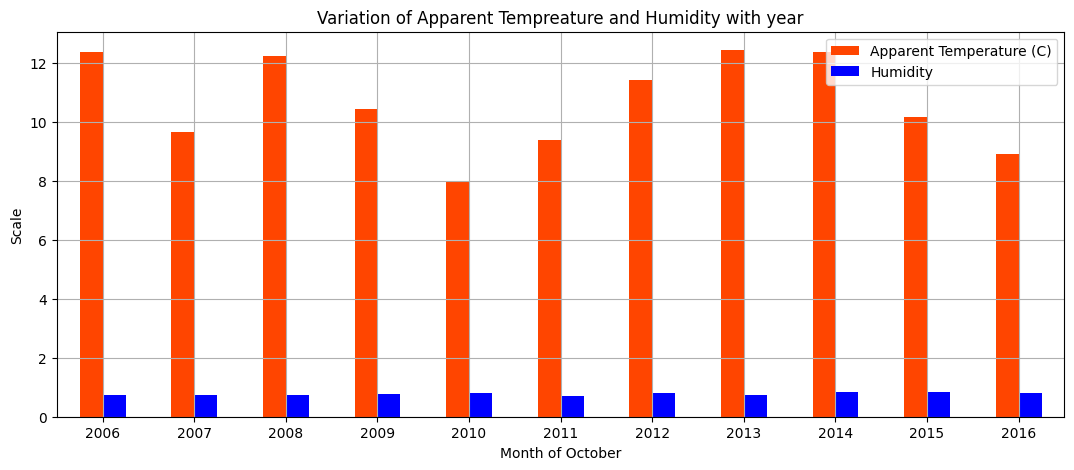

In [551]:
# Bar plot

data[data.index.month.isin([10])].plot.bar(figsize=(13,5),
                                       xlabel='Month of October',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.grid(True);

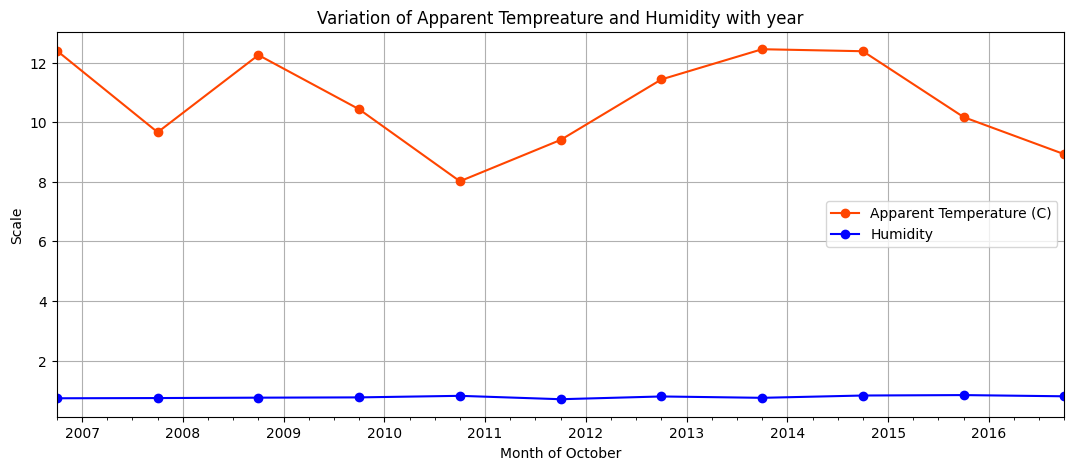

In [552]:
# Line plot

data[data.index.month.isin([10])].plot(figsize=(13,5),
                                      marker='o',
                                      xlabel='Month of October',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year');
plt.grid();

# **11. November**
**(autumn)**

In [298]:
nov =data[data.index.month.isin([11])]
nov

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-11-30 00:00:00+00:00,5.328310,0.812722
2007-11-30 00:00:00+00:00,1.218225,0.801444
2008-11-30 00:00:00+00:00,5.415039,0.766972
2009-11-30 00:00:00+00:00,6.177222,0.865292
2010-11-30 00:00:00+00:00,7.440934,0.858722
2011-11-30 00:00:00+00:00,1.368519,0.800528
2012-11-30 00:00:00+00:00,6.608133,0.871389
2013-11-30 00:00:00+00:00,6.425664,0.824792
2014-11-30 00:00:00+00:00,6.639097,0.839736


In [299]:
nov['Apparent Temperature (C)'].describe() , nov['Humidity'].describe()

(count    11.000000
 mean      5.020255
 std       2.157034
 min       1.218225
 25%       4.188468
 50%       5.553040
 75%       6.516898
 max       7.440934
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.827917
 std       0.032129
 min       0.766972
 25%       0.807083
 50%       0.824792
 75%       0.853597
 max       0.871389
 Name: Humidity, dtype: float64)

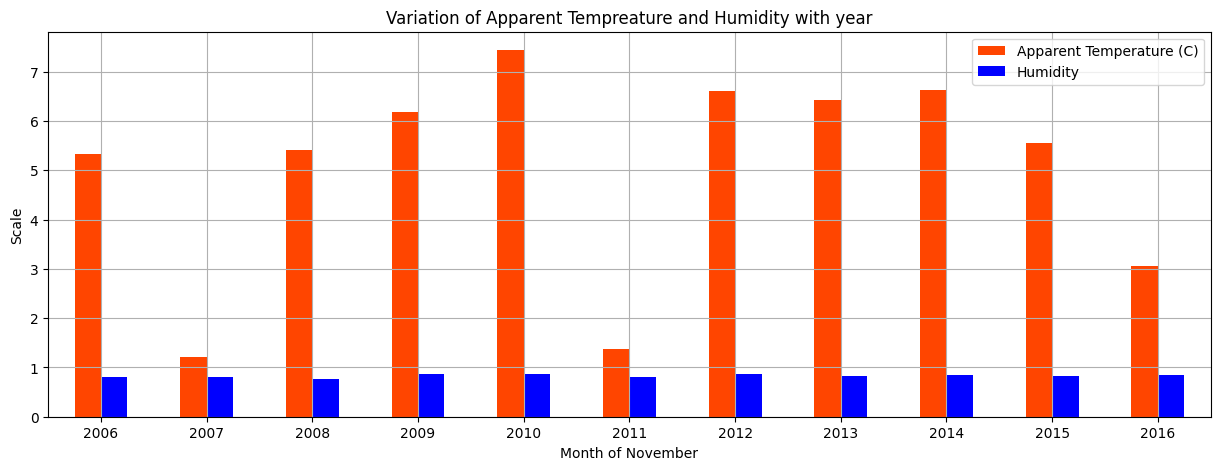

In [553]:
# Bar plot

data[data.index.month.isin([11])].plot.bar(figsize=(15,5),
                                       xlabel='Month of November',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.grid(True);

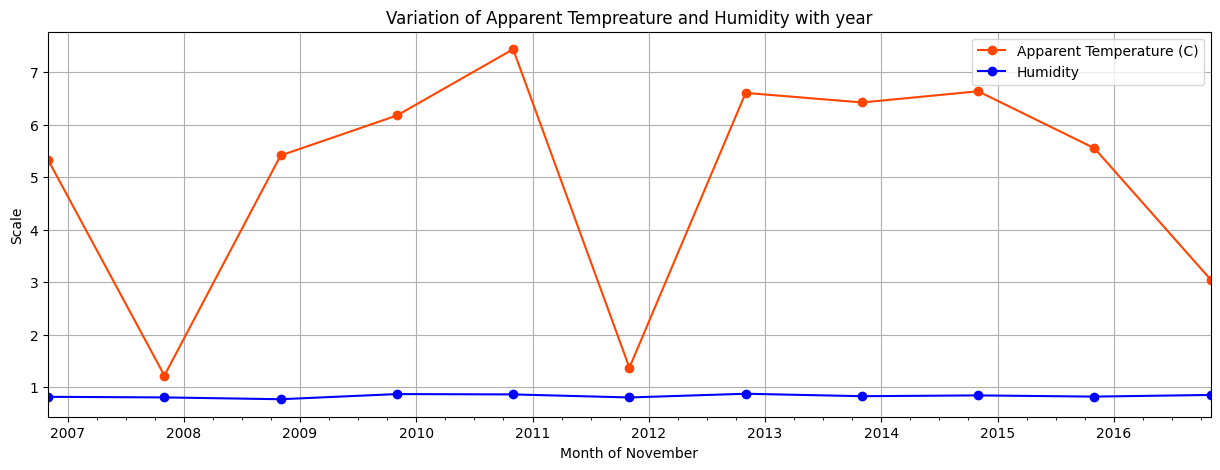

In [554]:
# Line plot

data[data.index.month.isin([11])].plot(figsize=(15,5),
                                      marker='o',
                                      xlabel='Month of November',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year');
plt.grid();

#**12. December**
**(winter)**

In [300]:
dec =data[data.index.month.isin([12])]
dec

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-12-31 00:00:00+00:00,0.107310,0.905376
2007-12-31 00:00:00+00:00,-2.964897,0.856250
2008-12-31 00:00:00+00:00,0.327389,0.828226
2009-12-31 00:00:00+00:00,-0.169086,0.844637
2010-12-31 00:00:00+00:00,-3.485947,0.913602
2011-12-31 00:00:00+00:00,0.618093,0.866223
2012-12-31 00:00:00+00:00,-3.672909,0.886801
2013-12-31 00:00:00+00:00,-0.690054,0.823965
2014-12-31 00:00:00+00:00,0.556586,0.835927


In [301]:
dec['Apparent Temperature (C)'].describe() , dec['Humidity'].describe()

(count    11.000000
 mean     -0.960195
 std       1.742479
 min      -3.672909
 25%      -2.491085
 50%      -0.169086
 75%       0.441988
 max       0.828644
 Name: Apparent Temperature (C), dtype: float64, count    11.000000
 mean      0.870398
 std       0.035632
 min       0.823965
 25%       0.840282
 50%       0.866223
 75%       0.896679
 max       0.925390
 Name: Humidity, dtype: float64)

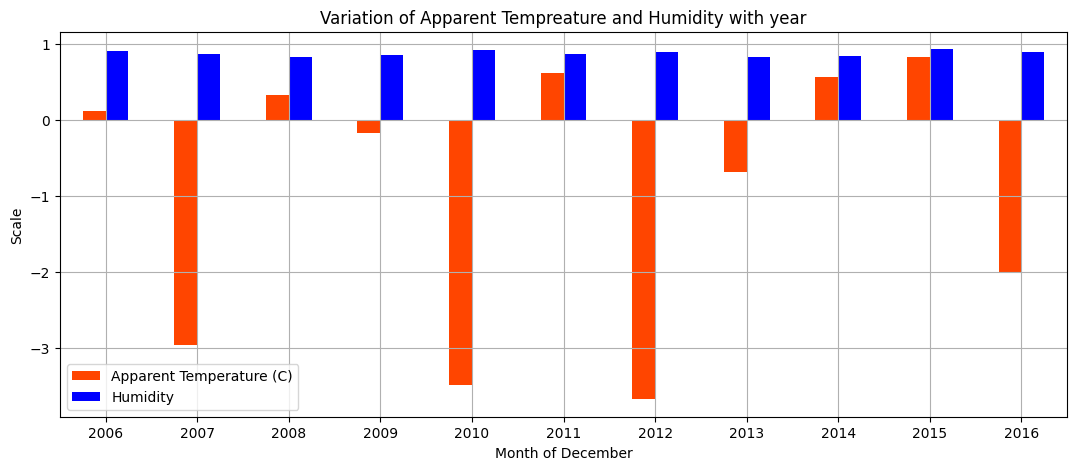

In [555]:
# Bar plot

data[data.index.month.isin([12])].plot.bar(figsize=(13,5),
                                       xlabel='Month of December',
                                      ylabel='Scale',
                 color=['orangered','blue'])
index = np.arange(11)
plt.xticks(rotation=0)
plt.xticks(index , ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.title('Variation of Apparent Tempreature and Humidity with year')
plt.grid(True);

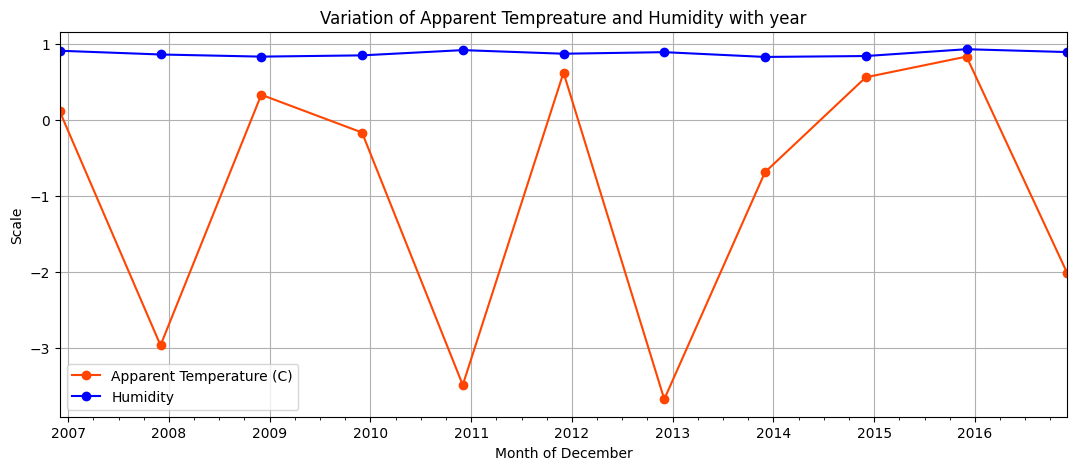

In [556]:
# Line plot

data[data.index.month.isin([12])].plot(figsize=(13,5),
                                      marker='o',
                                      xlabel='Month of December',
                                      ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Apparent Tempreature and Humidity with year');
plt.grid();

## **All these statistics compared month-wise can be viewed as an instance as:**

In [413]:
for i in range(2006,2017):
  print(f'Mean Statsitics for the year: {i}')
  print(f'{data[data.index.year.isin([i])].mean()}')

Mean Statsitics for the year: 2006
Apparent Temperature (C)    10.091090
Humidity                     0.767717
dtype: float64
Mean Statsitics for the year: 2007
Apparent Temperature (C)    11.008692
Humidity                     0.690331
dtype: float64
Mean Statsitics for the year: 2008
Apparent Temperature (C)    11.029242
Humidity                     0.701208
dtype: float64
Mean Statsitics for the year: 2009
Apparent Temperature (C)    11.008698
Humidity                     0.707834
dtype: float64
Mean Statsitics for the year: 2010
Apparent Temperature (C)    10.009624
Humidity                     0.797404
dtype: float64
Mean Statsitics for the year: 2011
Apparent Temperature (C)    10.511277
Humidity                     0.736254
dtype: float64
Mean Statsitics for the year: 2012
Apparent Temperature (C)    10.693165
Humidity                     0.689878
dtype: float64
Mean Statsitics for the year: 2013
Apparent Temperature (C)    10.770698
Humidity                     0.754963
dtype: 

In [450]:
#data[data.index.year.isin([2010])].mean()

In [452]:
#disc={'Apparent Temperature (C)':data[data.index.year.isin([2006])].mean()[0],'Humidity':data[data.index.year.isin([2006])].mean()[1]}
#data[data.index.year.isin([2010])].mean()[0]
#isc

In [455]:
temp_dict={}
humid_dict={}
for i in range(2006,2017):
  temp_dict[f'Year {i}']=data[data.index.year.isin([i])].mean()[0]
  humid_dict[f'Year {i}']=data[data.index.year.isin([i])].mean()[1]
temp = pd.Series(temp_dict)
humid = pd.Series(humid_dict)
year_df = pd.DataFrame({'Average Apparent Temperature (C) of all months':temp,'Average Humidity of all months':humid})
year_df

,Average Apparent Temperature (C) of all months,Average Humidity of all months
Year 2006,10.091090,0.767717
Year 2007,11.008692,0.690331
Year 2008,11.029242,0.701208
Year 2009,11.008698,0.707834
Year 2010,10.009624,0.797404
Year 2011,10.511277,0.736254
Year 2012,10.693165,0.689878
Year 2013,10.770698,0.754963
Year 2014,11.585657,0.748870
Year 2015,11.275878,0.732399


### **Variation of Average Apparent tempereature of 10 years**

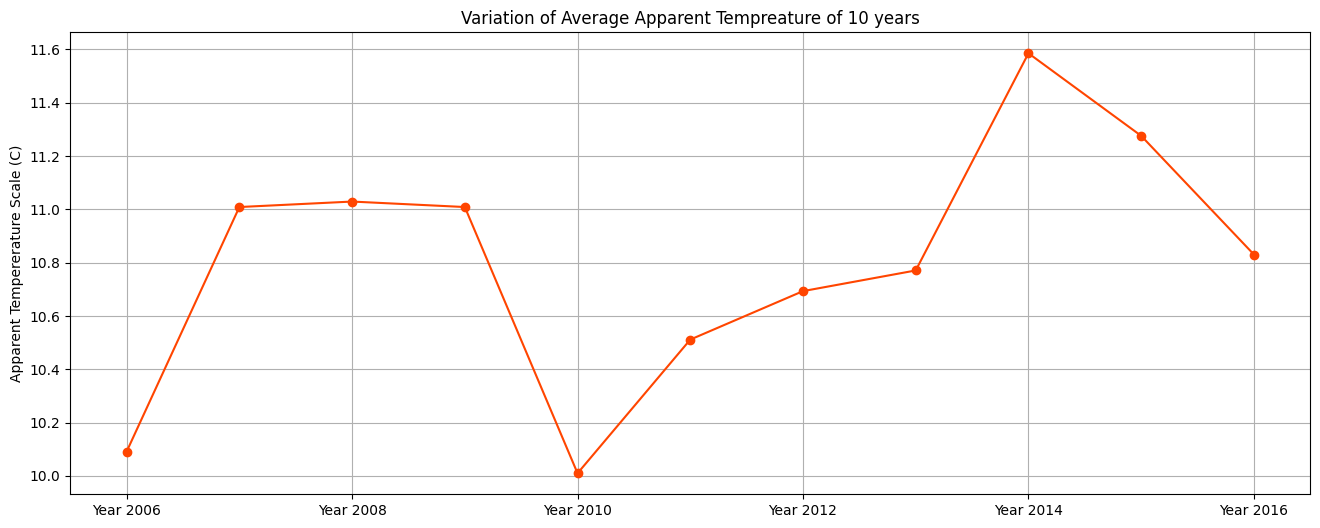

In [515]:

temp.plot(figsize=(16,6),
          marker='o',
          color ='orangered',
          ylabel='Apparent Tempererature Scale (C)')
plt.title('Variation of Average Apparent Tempreature of 10 years');
plt.grid();

###  **Variation of Average Humidity of 10 years**

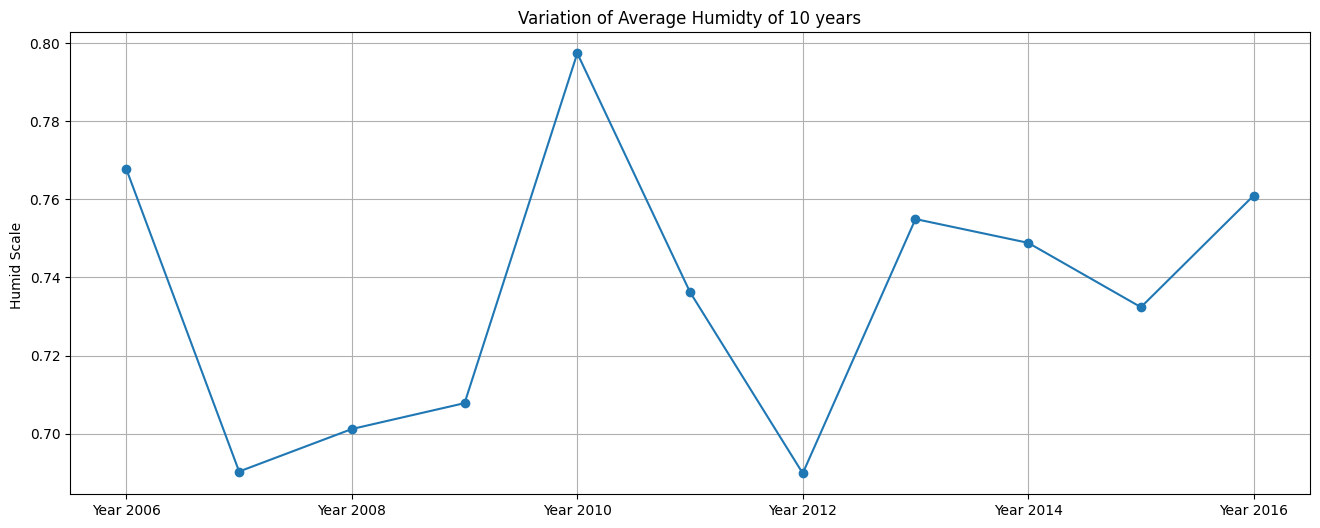

In [512]:

humid.plot(figsize=(16,6),
          marker='o',
          ylabel='Humid Scale ')
plt.title('Variation of Average Humidty of 10 years');
plt.grid();

### **Variation of Average Apparent Temperature and Average Humidity of 10 years**

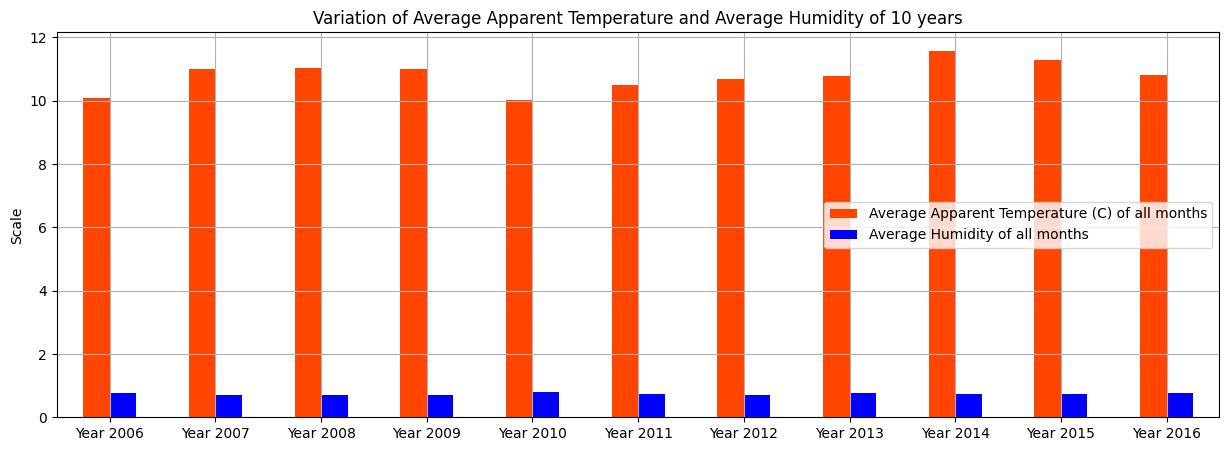

In [514]:
year_df.plot.bar(figsize=(15,5),
                 ylabel='Scale',
                 color=['orangered','blue'])
plt.title('Variation of Average Apparent Temperature and Average Humidity of 10 years')
plt.legend(loc='center right')
plt.xticks(rotation=0)
plt.grid(True);


## From all the above graphs and analysis  we can now tell that, on average, the apparent temperature and humidity are fluctuating year by year and it becomes very uncertain to predict.

## **Remember the Hypothesis :” Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming”.**
